In [1]:
from sklearn import datasets
import pandas as pd

%matplotlib inline

# Build a model

In [2]:


ds = datasets.load_breast_cancer();
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(min_samples_leaf=30, random_state = 1960)
NC = 12

X = ds.data[:,0:NC]
y = ds.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1960)

clf.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1960,
            splitter='best')

# Decision Tree Plot

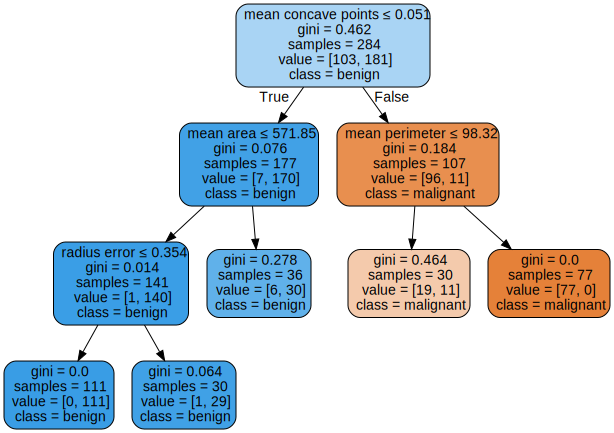

In [3]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=ds.feature_names[0:NC],  
                         class_names=ds.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph


# sklearn_explain approach

In [4]:
# Explain the score = ln(p(1) / (1 - p(1)))


import sklearn_explain.explainer as expl
lExplainer = expl.cModelScoreExplainer(clf)
lExplainer.mSettings.mFeatureNames = ds.feature_names[0:NC]
lExplainer.mSettings.mExplanationOrder = 1
    
lExplainer.fit(X_train)
df_rc = lExplainer.explain(X_test)

print(df_rc.columns)


USING_LOG_ODDS_AS_SCORE
SCORE_QUANTILES {0: -inf, 1: -11.512915464920228, 2: 1.6094379124341005, 3: 3.367295829986474, 4: 11.51291546492478}
CONST_SCORE_DETECTIOM -11.512915464920228 11.51291546492478 False
NON_USED_FEATURES ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean symmetry', 'mean fractal dimension', 'texture error']
USED_FEATURES ['mean perimeter', 'mean area', 'mean concave points', 'radius error']
FEATURE_QUANTILES mean perimeter {0: -inf, 1: 71.884, 2: 80.624, 3: 90.566, 4: 111.44}
FEATURE_QUANTILES mean area {0: -inf, 1: 387.1, 2: 477.3, 3: 602.0, 4: 922.44}
FEATURE_QUANTILES mean concave points {0: -inf, 1: 0.017368, 2: 0.027374, 3: 0.047373999999999965, 4: 0.08419800000000001}
FEATURE_QUANTILES radius error {0: -inf, 1: 0.21352, 2: 0.26870000000000005, 3: 0.36444, 4: 0.55352}
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean conca

In [5]:
df_rc_2 = lExplainer.explain(X_test[0].reshape(1, -1))

In [6]:
X_test[0].reshape(1, -1)

array([[1.176e+01, 2.160e+01, 7.472e+01, 4.279e+02, 8.637e-02, 4.966e-02,
        1.657e-02, 1.115e-02, 1.495e-01, 5.888e-02, 4.062e-01, 1.210e+00]])

In [7]:
df_rc_2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,reason_3,reason_4,reason_1_idx,detailed_reason_1,reason_2_idx,detailed_reason_2,reason_3_idx,detailed_reason_3,reason_4_idx,detailed_reason_4
0,11.76,21.6,1,1,0.08637,0.04966,0.01657,0,0.1495,0.05888,...,mean area,mean perimeter,2,[(-inf < 'mean concave points' <= 0.017368)],3,[(0.36444 < 'radius error' <= 0.55352)],1,[(387.1 < 'mean area' <= 477.3)],0,[(71.884 < 'mean perimeter' <= 80.624)]


In [8]:
df_rc_2[[col for col in df_rc_2.columns if col.startswith('detailed')]]

,detailed_reason_1,detailed_reason_2,detailed_reason_3,detailed_reason_4
0,[(-inf < 'mean concave points' <= 0.017368)],[(0.36444 < 'radius error' <= 0.55352)],[(387.1 < 'mean area' <= 477.3)],[(71.884 < 'mean perimeter' <= 80.624)]


                                       0
mean concave points_Effect  6.380884e-04
radius error_Effect         1.576499e-05
mean perimeter_Effect      -1.110223e-15
mean area_Effect           -1.110223e-15


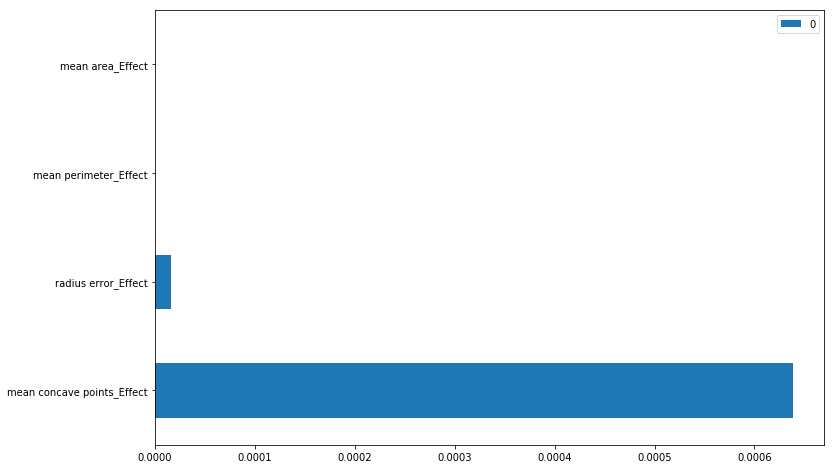

In [9]:
effects = [col for col in df_rc_2.columns if col.endswith('_Effect')]
transposed = df_rc_2[effects].transpose()
sorted_rc = transposed.sort_values(by=transposed.columns[0] , ascending=False)
print(sorted_rc.head())
sorted_rc.plot.barh(figsize=(12,8))
